# wikiHow: Topic Modelling and Analysis
<b>wikiHow</b> is a popular online encyclopedia featuring how-to guides across a variety of different topics. This project uses a (Kaggle) <a href="https://www.kaggle.com/datasets/elfarouketawil/wikihow-featured-articles">dataset</a> containing around 1,000 featured articles. Each row contains the articles title, introduction paragraph and full article contents. Additionally, other details such as number of views and authors.
<br>
The aim of this anaylsis is to group articles together into similar topics using various NLP and unsupervised machine learning techniques. After this, the different characteristics and popularity of each topic can be examined.

## Introduction
First, load the dataset as a Pandas dataframe and examine the structure of the data:

In [1]:
# General imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

full_df = pd.read_csv("articles.csv")
full_df.head()

,Title,Intro,Article Content,Co-authors,Updated,Views
0,How to Perform the Tahajjud Prayer,The Tahajjud is a special Islamic night prayer...,Arrange to wake up after midnight. After prayi...,60,"Updated: March 21, 2023",5638718
1,How to Take a Screenshot on a Windows PC: 8 Si...,Need to take a screenshot on your Windows PC? ...,Go to the screen that you want to capture. Whe...,321,"Updated: April 15, 2023",35602414
2,How to Play Poker,\nLooking to learn basic poker rules? Poker’s ...,Learn the 10 basic 5-card hands and their rank...,229,"Updated: April 12, 2023",7598092
3,How to French Kiss,\nYou've seen it done in the movies and probab...,"Keep your lips soft. A soft, smooth, and sligh...",287,"Updated: December 13, 2022",27872519
4,How to Kiss,"\nSo you finally got ""the look"" and you're mov...",Drop hints that you're interested. You can put...,309,"Updated: April 8, 2023",33291709


Initial examination shows the structure of the dataset. From the first 5 rows, we can already see that the topics are quite varied.  

In [2]:
full_df.shape

(997, 6)

There are 997 different articles and six different columns:
<ul>
    <li><b>Title</b> - article title</li>
    <li><b>Intro</b> - introduction</li>
    <li><b>Article Content</b> - contents of the article</li>
    <li><b>Co-authors</b> - number of authors</li>
    <li><b>Updated</b> - the date of the most recent update</li>
    <li><b>Views</b> - number of views</li>
</ul>
The first stage is to transform the text into the dataframe from human language into something that can be interpreted by a computer.
</p>
First concatenate Intro with Article Content as simply Article:

In [3]:
full_df["Article"] = full_df["Intro"] +  " " + full_df["Article Content"]
full_df.head()

,Title,Intro,Article Content,Co-authors,Updated,Views,Article
0,How to Perform the Tahajjud Prayer,The Tahajjud is a special Islamic night prayer...,Arrange to wake up after midnight. After prayi...,60,"Updated: March 21, 2023",5638718,The Tahajjud is a special Islamic night prayer...
1,How to Take a Screenshot on a Windows PC: 8 Si...,Need to take a screenshot on your Windows PC? ...,Go to the screen that you want to capture. Whe...,321,"Updated: April 15, 2023",35602414,Need to take a screenshot on your Windows PC? ...
2,How to Play Poker,\nLooking to learn basic poker rules? Poker’s ...,Learn the 10 basic 5-card hands and their rank...,229,"Updated: April 12, 2023",7598092,\nLooking to learn basic poker rules? Poker’s ...
3,How to French Kiss,\nYou've seen it done in the movies and probab...,"Keep your lips soft. A soft, smooth, and sligh...",287,"Updated: December 13, 2022",27872519,\nYou've seen it done in the movies and probab...
4,How to Kiss,"\nSo you finally got ""the look"" and you're mov...",Drop hints that you're interested. You can put...,309,"Updated: April 8, 2023",33291709,"\nSo you finally got ""the look"" and you're mov..."


## Vectorization
Vectorization can transform a document into an n-dimensional vector, where n is the number of unique words (or grams) in the corpus. These vectors can simply be the frequency of each word in the document (bag of words approach) or weighted in a way that gives relatively rare words in the corpus more significance when they appear in a particulary document (Term frequency inverse document frequency or tf-idf).

Create a new dataframe only containing the article text and titles fields:

In [4]:
df_text = full_df.drop(columns=["Co-authors", "Intro", "Article Content", "Updated", "Views"], axis=1)
df_text.head()

,Title,Article
0,How to Perform the Tahajjud Prayer,The Tahajjud is a special Islamic night prayer...
1,How to Take a Screenshot on a Windows PC: 8 Si...,Need to take a screenshot on your Windows PC? ...
2,How to Play Poker,\nLooking to learn basic poker rules? Poker’s ...
3,How to French Kiss,\nYou've seen it done in the movies and probab...
4,How to Kiss,"\nSo you finally got ""the look"" and you're mov..."


### Preprocessing
Preprocessing the text is the first step in changing it from unstructured data to a form that can be understood by machine learning algorithms. In this case, preprocessing will consist of three steps: word tokenization, stop word removal and stemming.

#### Tokenization
Tokenization is the process of spliting up a piece of text into smaller discrete elements known as tokens. Here, the Natural Language Toolkit (NLTK) word tokenizer is used to split each of the articles into a list of individual words and punctuation.

In [5]:
from nltk.tokenize import word_tokenize

article_tokenized = [word_tokenize(t) for t in df_text["Article"]]

#### Stop words
Stop words are frequently occurring words that provide syntactic structure but contain little lexical meaning such as pronouns or conjunctions. Stop words should be removed to reduce noise and meaningless features in the vectorised data. Stop words are removed using the NLTK list of English stop words.

In [6]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_article = [[t.lower() for t in doc if t.lower() not in stop_words] for doc in article_tokenized]

#### Stemming
The final step in preprocessing is stemming. Stemming reduces inflected forms of words into their base form (stem) by removing the affixes. Because of how it works, stemming can sometimes result in stems that are not real words (for example, "babies" stems to "babi"). For this reason stop words are removed before stemming. Another limitation of stemming is that irregular plurals do not get stemmed (for example: "men"). Lemmatization reduces words to their lemma form, but it requires parts of speech to be attached to the words.
<p>Stem the words with NLTK PorterStemmer:

In [7]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_article = [[stemmer.stem(t) for t in doc] for doc in filtered_article]

After preprocessing the text, add it to the dataframe and convert from a list to a string:

In [8]:
df_text["Processed Article"] = stemmed_article
df_text["Processed Article"] = df_text["Processed Article"].apply(lambda x: " ".join(x))

Drop the unprocessed article text, leaving just the Title and Processed Article text:

In [9]:
df_text = df_text.drop(columns="Article", axis=1)
df_text.head()

,Title,Processed Article
0,How to Perform the Tahajjud Prayer,tahajjud special islam night prayer recommend ...
1,How to Take a Screenshot on a Windows PC: 8 Si...,need take screenshot window pc ? whether want ...
2,How to Play Poker,look learn basic poker rule ? poker ’ incred p...
3,How to French Kiss,'ve seen done movi probabl even public—th fren...
4,How to Kiss,final got `` look '' 're move killer kiss dawn...


### tf-idf
Vectorise Processed Intro using sklearn's tf-idf vectorizer. The parameters are set to include single words and also common pairs of words (n-grams of 1 and 2). This allows collocations and other pairs of words that may have different semantics when taken separately (for example, phrasal verbs). Furthermore, any gram with a low or high relative frequency will be excluded. This will help to reduce the number of features and noise in the model. Punctuation will automatically be filtered out.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_article = TfidfVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.95)
tfidf_article = vectorizer_article.fit_transform(df_text["Processed Article"])

Create a dataframe using the generated tf-idf matrix with the feature names as the columns:

In [11]:
article_features = vectorizer_article.get_feature_names_out()
vect_article_df = pd.DataFrame(tfidf_article.toarray(), columns=article_features)

This creates the vectorised article dataframe containing 713 features:

In [12]:
vect_article_df.head()

,10,100,12,15,20,30,abl,access,account,across,...,work,world,worri,would,wrap,write,wrong,www,year,yet
0,0.000000,0.000000,0.0,0.0,0.000000,0.019086,0.045500,0.000000,0.0,0.00000,...,0.036421,0.000000,0.044704,0.017088,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.028565,0.008783,0.0,0.0,0.000000,0.012485,0.000000,0.008471,0.0,0.00000,...,0.003971,0.000000,0.000000,0.005589,0.000000,0.000000,0.000000,0.008979,0.0,0.000000
2,0.040439,0.000000,0.0,0.0,0.020505,0.017675,0.014046,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.039562,0.000000,0.000000,0.000000,0.000000,0.0,0.024542
3,0.000000,0.000000,0.0,0.0,0.014371,0.012388,0.019688,0.016810,0.0,0.00000,...,0.007880,0.017669,0.029015,0.011091,0.014851,0.014591,0.017718,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031923,0.000000,0.0,0.03101,...,0.008518,0.038200,0.015682,0.011989,0.000000,0.015773,0.000000,0.000000,0.0,0.018593


## Truncated SVD
SVD (Single Value Decomposition) is a technique that can reduce the dimensionality of a sparse tf-idf matrix. It works by decomposing the matrix into three component matrices thereby reducing the dimensionality while preserving the most important features. This reduces noise and improves the efficiency of subsequent machine learning algorithms such as k-means clustering. By applying SVD to the tf-idf matrix, we can obtain a lower-dimensional representation that captures the essential information needed for clustering.
</p>
<b>Note:</b> SVD can also be used directly for topic modelling where the number of topic corresponds to the number of components. Articles can then be assigned a topic (or potentially more) based on the SVD component (or components) they score highest in. Topic names can be determined by looking at the terms with the highest weights for each component. This is similar to the workflow for non-negative matrix factorization (NMF). However, in this case where the number of topics is unknown, SVD is used as a means to reduce the dimensionality of the matrix in preparation for k-means clustering in a similar way to principal component analysis (PCA).

### Number of components
Reducing the dimensionality of a matrix with SVD also reduces the amount of explained variance. For most purposes, an explained variance of about 80 to 90% is adequate. Plot the amount of explained variance against the number of components to determine how many components are necessary.

In [13]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=713, random_state=2)
svd_matrix = svd.fit_transform(vect_article_df)

explained_variance = svd.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


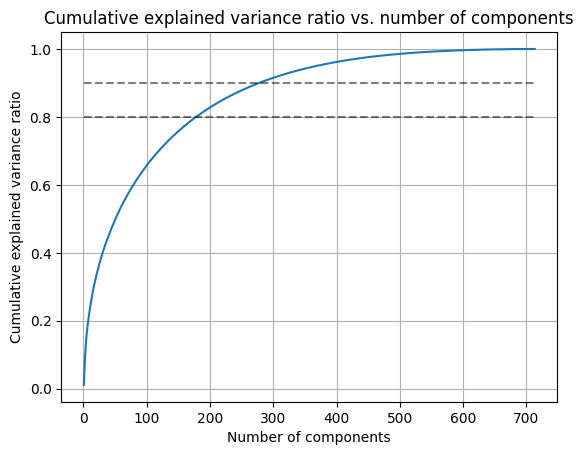

In [14]:
fig, ax = plt.subplots()
x = range(1, 714)
ax.plot(x, cumulative_variance)
ax.set(
        title="Cumulative explained variance ratio vs. number of components",
        xlabel="Number of components",
        ylabel="Cumulative explained variance ratio",
      )
ax.plot(x, np.ones_like(x) * 0.8, "--", color="black", alpha=0.5)
ax.plot(x, np.ones_like(x) * 0.9, "--", color="black", alpha=0.5)
ax.grid()
plt.show()

From the graph above, the desired interval of 80-90% of cumulative explained variance is found at between 180 and 280 components. After this point, explained variance levels off. When 194 components are chose, 81.9% of the variance is explained. This greatly reduces the features in the dataset while preserving a large proprotion of explained variance.

In [15]:
svd = TruncatedSVD(n_components=194, random_state=2)
svd_matrix = svd.fit_transform(vect_article_df)


## k-means clustering
k-means clustering is an unsupervised machine learning technique that attempts to group observations into k distinct clusters. Each observation is assigned to a cluster depending on its mean. Each cluster has a centroid, the prototypical member of that cluster and is calculated as the mean of all observations in that cluster.
### Number of clusters
The number of clusters, k, must be specified beforehand. There are ways to find the optimal number. One such method is by calculating silhouette scores.
#### Silhouette score
The silhouette score is a number calculated for each datapoint between -1 and 1. A datapoint's score corresponds to how well it fits within a cluster. A score of 1 indicates that it is well matched, and a a score -1 indicates that it is in the wrong cluster. A score of zero means that the datapoint is on a boundary between two clusters. The average score across all datapoints can be used to determine how many clusters best fit the data.


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(2,15)
silhouette_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init="auto")
    labels = kmeans.fit_predict(svd_matrix)
    score = silhouette_score(svd_matrix, labels)
    silhouette_scores.append(score)

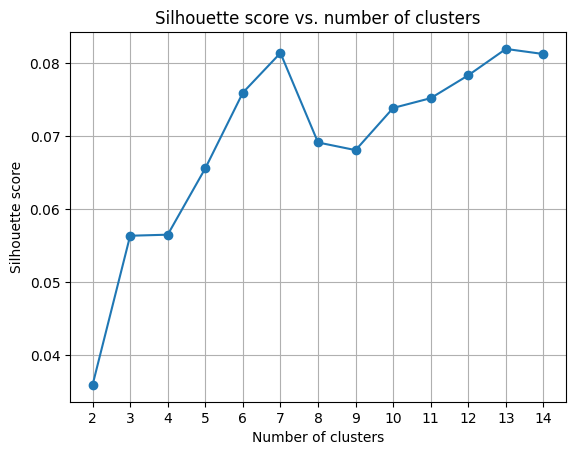

In [17]:
fig, ax = plt.subplots()
    
ax.plot(ks, silhouette_scores, '-o')
ax.set(
        title="Silhouette score vs. number of clusters",
        xlabel="Number of clusters",
        ylabel="Silhouette score",
        xticks=ks
      )
ax.grid()
plt.show()

From the graph above, we can see that <b>7 clusters</b> gives one of the highest silhouette scores (0.081). However, it is worth noting that even the highest silhouette scores are quite close to zero. This suggests that the articles are not easy to group together based on a topic. This is consistent with the dataset being a selection of the featured articles and so are drawn from the full breadth of the encyclopedia. Thirteen clusters actually provides a slightly higher silhouette score (0.082). However, seven clusters is a good compromise between silhouette scores and number of topics.
</p>Continuing with 7 clusters:

In [18]:
kmeans = KMeans(n_clusters=7, random_state=2, n_init="auto")
clusters = kmeans.fit_predict(svd_matrix)

Add the corresponding clusters to the dataframe:

In [19]:
full_df["Cluster"] = clusters
# For brevity, select just titles and Cluster
full_df[["Title", "Cluster"]].head()

,Title,Cluster
0,How to Perform the Tahajjud Prayer,3
1,How to Take a Screenshot on a Windows PC: 8 Si...,5
2,How to Play Poker,0
3,How to French Kiss,3
4,How to Kiss,3


Based on the first five articles, similarly titled articles have been assigned to the same cluster.

### Initial cluster analysis
How many articles are assigned to each cluster, and is the distribution of articles between the clusters equal?
</p>
Examine the number of articles in each cluster.

In [20]:
cluster_numbers = full_df["Cluster"].value_counts().sort_index()
cluster_numbers

Cluster
0    254
1     68
2    241
3    176
4     38
5    135
6     85
Name: count, dtype: int64

As shown above, the articles are not distributed evenly and the sizes of the clusters vary a lot. If the clusters were all equal sizes, we would expect around 142 articles (or 14.29%) in each cluster. Therefore, clusters 0 (25.47%), 2 (24.17%) and 3 (17.65%) are larger than expected and probably probably a broad or multiple topics. Other clusters are smaller. Clusters 1 (6.82%), 4 (3.81%) and 6 (8.54%) are all smaller than expected and probably contain articles about more specific or less represented topics.
</p>
This information is presented graphically below:

Text(0.5, 1.0, 'Number of articles per cluster')

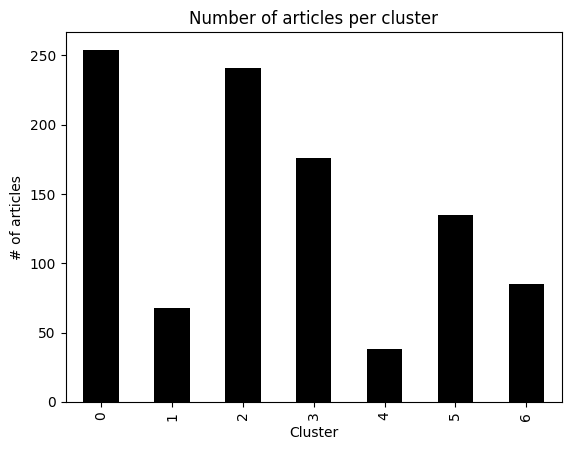

In [21]:
cluster_numbers.plot(kind="bar", color="black")
plt.xlabel("Cluster")
plt.ylabel("# of articles")
plt.title("Number of articles per cluster")

#### Cluster inertia
The inertia of a cluster measures how internally coherent that cluster is by how tightly the data points are around its centroid. A high inertia indicates that the data points within that cluster are spread out resulting in a less compact cluster, whereas low intertia indicates a compact cluster. Inertia is calculated as the square distance between each data point and the centroid of its assigned cluster. For the purposes of k-means clustering, inertia should be minimised.
</p>
Total inertia for all the clusters:

In [22]:
kmeans.inertia_

594.1623320710008

The total inertia is relatively high. This suggests that the clusters are not very distinct.
</p>
What are the inertias scores for each of the clusters found? Do the larger clusters have higher inertia?
</p>
Calculate the average inertia for each cluster by summing up the total inertia and dividing by the number of data points in the cluster. The average will allow clusters of different sizes to be compared.

In [23]:
centroids = kmeans.cluster_centers_
inertias_sum = []
inertias_mean = []

for label in range(7):
    cluster_points = svd_matrix[clusters == label]
    inertia_sum = ((cluster_points - centroids[label]) ** 2).sum()
    inertia_mean = inertia_sum / len(cluster_points)
    inertias_sum.append(inertia_sum)
    inertias_mean.append(inertia_mean)

cluster_inertias = {"cluster": range(7), "mean inertia": inertias_mean, "total inertia": inertias_sum, "articles": cluster_numbers}
pd.DataFrame(cluster_inertias).set_index("cluster")

,mean inertia,total inertia,articles
cluster,,,
0,0.720487,183.003687,254
1,0.573134,38.973098,68
2,0.603728,145.498343,241
3,0.513134,90.311535,176
4,0.230088,8.743360,38
5,0.563693,76.098520,135
6,0.606280,51.533789,85


The table displays the mean inertia, total inertia and number of articles in each cluster. As expected, the clusters with the most inertia also have the most articles. For this reason, the mean inertia is taken. Cluster 4 is both the smallest in size and has the lowest average inertia, suggesting a small relatively compact cluster with a clear topic. On the other hand, the largest cluster, cluster 0, also has the highest average inertia. This suggests that Cluster 0 deals with a broad topic that can include many different articles. The other clusters fall between these two extremes, but a large cluster is not an immediate indication of high average inertia; for example Cluster 3 is large but has one of the lowest average inertias.

### t-SNE
Now that we have a better idea of how the data  clustered, it would be helpful to visualise the clusters in space. However, the dataset has 194 dimension and would be impossible to plot. t-SNE (or t-Distributed Stochastic Neighbor Embedding) is useful in this situation. t-SNE is another dimensionality reduction technique, but is more often used to visual high dimensionality data in two or three dimensions rather than as a preprocessing step. t-SNE maps data points from higher dimensionalities to lower dimensions while preserving local distances.

In [24]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(learning_rate="auto", perplexity=50, random_state=2)
TSNE_matrix = TSNE_model.fit_transform(svd_matrix)


The t-SNE transforms the dataset from 194 dimension to 2. This allows the data to be plotted:

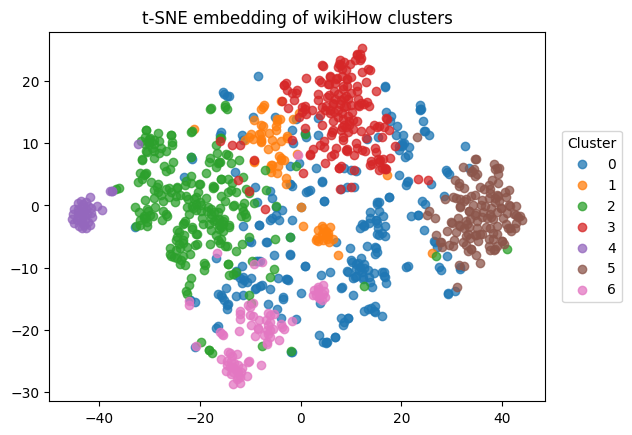

In [25]:
unique_clusters = set(clusters)

fig, ax = plt.subplots()

for cluster in unique_clusters:
    xs = TSNE_matrix[clusters == cluster][:, 0]
    ys = TSNE_matrix[clusters == cluster][:, 1]
    ax.scatter(xs, ys, label=cluster, alpha=0.75)

ax.set(title="t-SNE embedding of wikiHow clusters")
ax.legend(title="Cluster", bbox_to_anchor=(1.02, 0.5), loc='center left')


The above chart shows the t-SNE transformed distribution of the data points and their corresponding cluster. As expected from previous analysis, the clusters are generally poorly defined and many data points from different clusters overlap.
</p>
Looking at each cluster specifically, we can see that <b>Cluster 4</b> is the most compact and distinct cluster. This is consistent with the fact that this cluster has by far the lowest inertia (0.23). Furthermore, Cluster 4 has very little overlap with other clusters, Cluster 2 being the exception. This suggests that the vocabulary used for articles in Cluster 4 is specific to a domain, but maybe deals with similar topics as Cluster 2.
</p>
<b>Cluster 5</b> is another relatively well defined cluster, with all the points contained within a region, albeit further spread out than Cluster 4 (inertia: 0.56). Cluster 5 also shows some overlap with other clusters, namely Cluster 0 and Cluster 2. This also suggests that Cluster 5 has a well defined topic.
</p>
<b>Cluster 3</b> is also fairly well defined, but has quite a lot of overlap with the neighbouring clusters. This suggests a relatively well defined topic, but one which has shared vocabulary with other topics.
</p>
<b>Cluster 1</b> and <b>Cluster 6</b> are quite similar. Cluster 6 appears to be made up of three smaller clusters with a few outliers, and shows a lot of overlap with both cluster 0 and Cluster 2. Cluster 1 on the other hand, seems to be made up of two (or three) smaller clusters and also overlaps with Cluster 0 and Cluster 2 and additionally Cluster 3. However, Cluster 1 and Cluster 6 do not show much overlap suggesting distinct topics. Both of these clusters seem good candidates to be subdivided.
</p>
<b>Cluster 2</b> is quite a large, spaced out cluster with data points across the chart. There is, however, an area of densly distributed datapoints making a central smaller cluster.
</p>
Finally, <b>Cluster 0</b> is the largest and least well defined cluster. It shows some degree of overlap with every other clusters except Cluster 4. There are a few area of dense data points, but these are also quite spaced out. This indicates that while there might be one central topic for Cluster 0, it also accepts a lot of various articles that do not fit well in other clusters.

## Determining the Topics
After examining the distribution and quality of the clusters, it is now time to assign a topic to each cluster.

### NMF
Non-Negative Matrix Factorization (NMF) is dimensionality reduction and feature extraction technique. NMF can represent a non-negative matrix such as a tf-idf matrix as two lower ranked non-negative matrices.  This allows for a more compact represenation of the original matrix. Terms from the original matrix can then be extracted from the new reduced vectors, with the terms with the highest weights being the most important for the topic.
</p>
NMF can be applied to the tf-idf matrix selected by cluster, and the highest weight terms extracted. These terms will form the basis of the topic name: 

In [26]:
from sklearn.decomposition import NMF

topics = []

for label in range(7):
    nmf_model = NMF(n_components=1, random_state=2)
    nmf_model.fit_transform(vect_article_df[clusters == label])
    for topic in nmf_model.components_:
      top_words = [article_features[i] for i in topic.argsort()[:-20:-1]]
      topics.append(f"Cluster {label}: {', '.join(top_words)}")
topics


['Cluster 0: number, game, play, hand, make, letter, one, point, measur, exampl, valu, get, first, turn, piec, squar, place, line, time',
 'Cluster 1: ball, foot, hand, arm, back, leg, feet, bodi, shoulder, exercis, posit, keep, push, practic, move, get, forward, side, right',
 'Cluster 2: water, dri, remov, skin, clean, heat, make, cloth, cut, oil, wash, leav, minut, appli, may, grow, cup, add, rins',
 'Cluster 3: feel, person, like, say, make, talk, re, peopl, time, friend, tri, get, someth, thing, ask, think, help, know, might',
 'Cluster 4: hair, section, cut, oil, head, dri, brush, remov, wash, finger, style, end, make, side, color, part, look, skin, length',
 'Cluster 5: click, tap, select, app, menu, window, file, icon, screen, open, account, comput, text, page, http, ll, enter, option, search',
 'Cluster 6: fold, paper, end, make, side, tie, line, pull, edg, top, corner, draw, bottom, cm, cut, squar, inch, center, half']

From the terms extracted, the following topics were chosen for each cluster:
<ul>
    <li>Cluster 0: Gaming and intellectual activities</li>
    <li>Cluster 1: Sport and physical activities</li>
    <li>Cluster 2: Hygiene and household tasks</li>
    <li>Cluster 3: Emotions and social interaction</li>
    <li>Cluster 4: Haircare </li>
    <li>Cluster 5: Computing and technology</li>
    <li>Cluster 6: Crafts and origami</li>
</ul>
These topics are consistent with previous findings. The most compact cluster, Cluster 4, has one clear topic while the other clusters have broader topics (Cluster 5 is similar). Is also clearer why there is some overlap between Cluster 4 and Cluster 2. Cluster 0, on the other hand, has the most ambigious topic and also the most inertia, and thus shows some degree of overlap with the other topics. The other topics are consistent with the distribution in the t-SNE chart. For example, Cluster 0 overlaps with Cluster 1. This overlap is probably the result of Gaming and Sport having similar vocabularies (players, points, score etc).

### Word clouds
The different topics can be further explored with word clouds. A wold cloud is a way to visualise text data as a collection of words with the size of the words related to how important it is.
</p>
First write a function to produce the word clouds:

In [27]:
from wordcloud import WordCloud

def cluster_word_cloud(cluster):
    topic_dict = {0: "games and intellect", 1: "sport and physical", 2: "hygiene and house", 3: "emotions and social", 4: "haircare", 5: "computers", 6: "crafts and origami"}
    word_cloud_string = " ".join(full_df["Article"][clusters == cluster])
    word_cloud = WordCloud(
                    background_color="white",
                    max_font_size=40,
                    random_state=2
                          )
    word_cloud.generate(word_cloud_string)

    fig = plt.figure()
    fig.suptitle(f"Word cloud for Cluster {cluster} ({topic_dict[cluster]})")
    fig.subplots_adjust(top=2.4)
    plt.axis("off")

    plt.imshow(word_cloud, interpolation='bilinear')


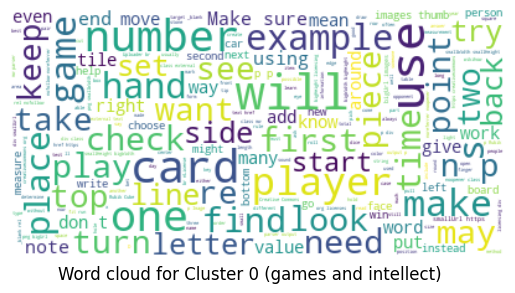

In [28]:
cluster_word_cloud(0)

The word cloud generated for Cluster 0 contains words consistent with games such "player", "card", "game" and "point". Intellectual activities is however quite broad and could include many different words.

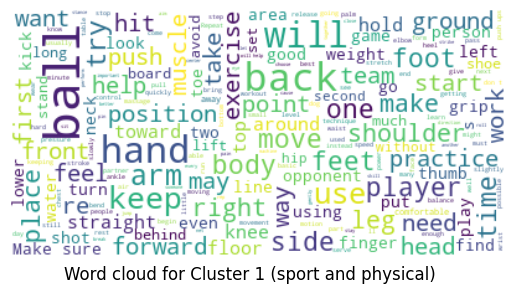

In [29]:
cluster_word_cloud(1)

Cluster 1's word cloud is also consistent with the topic of sport. As mentioned before, there is some overlap in topics with Cluster 0 between sports and games. It could have equally been possible to classify Sport and Games within the same cluster. There are also words related to the more abstract topic of 'physical activities'.

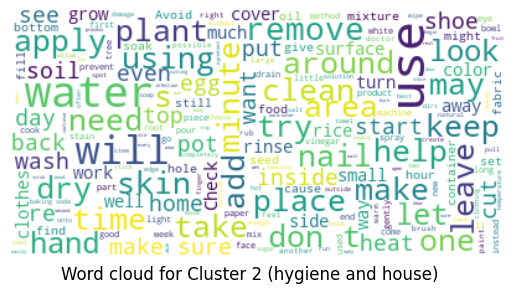

In [30]:
cluster_word_cloud(2)

Cluster 2 is one of the larger clusters, and as we can see in the word cloud, contains a few different topics. There are words related to plants such as "plant", "soil" and "seed", cooking such as "pot", "rice" and "heat", cleaning such as "clean", "surface" and "wash" and finally hygiene such as "skin", "rinse" and "soap". This explains why these articles were  clustered together and the limitations to this technique for topic modelling. All of the identified topics can be associated with the word "water".

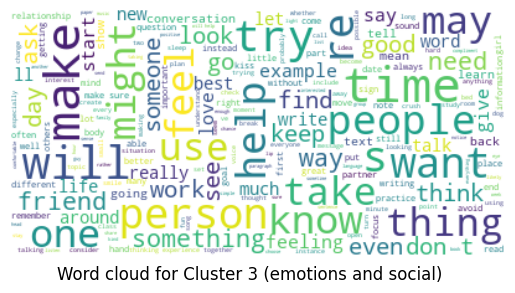

In [31]:
cluster_word_cloud(3)

Cluster 3 also has a word cloud consistent with the topics. "Person", "conversation" and "someone" are  related to social, while "feel",  "love" and "feeling" are the emotional words. It is also possible that some articles related to studying might be included in this topic from words like "focus", "writing" and "read" also being included.

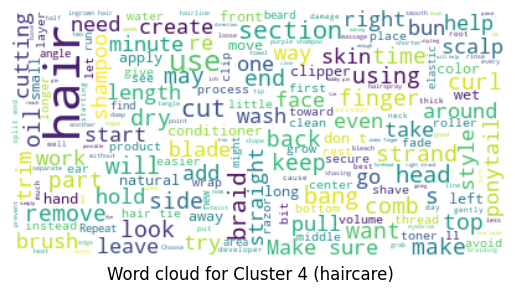

In [32]:
cluster_word_cloud(4)

Cluster 4 is the most compact cluster, and as such, the words in the word cloud reflect this. Most of the words are related to hair, but it also shows why there is an overlap with Cluster 2 with words such as "water", "oil" and "wash".  

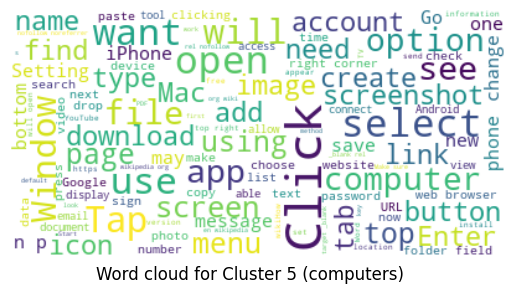

In [33]:
cluster_word_cloud(5)

Cluster 5 is similar to Cluster 4. Most of the main words are related to the topic of computers and technology. 

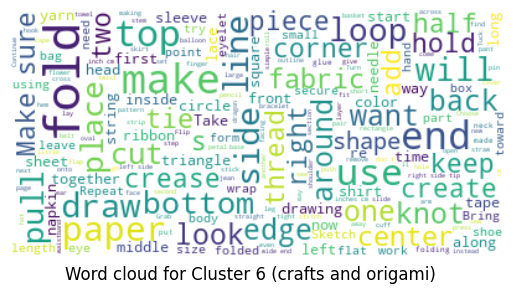

In [34]:
cluster_word_cloud(6)

Finally, Cluster 6 also looks fairly consistent. Most of the words in the cloud are related to crafts. The word "shoe" appears here and also in Cluster 2 partially explaining some of the overlap between those two clusters. 

## Similar articles
What articles are the most similar to each other? Are articles more similar to other articles within their cluster or outside of it? What other articles may interest a reader of a givenn article?
### Cosine similarity
A common method of measuring the similarity between two vectorized articles is cosine similarity. This metric calculates the angle between two vectors. The cosine of the angle gives the cosine similarity which ranges from -1 to 1. A cosine similarity score of 1 indicates that there is no difference between two articles (the angle between them is zero). Conversely,  a score of -1 indicates that the articles are completely opposite to each other (the angle between them is 180 degrees). Two articles with a cosine similarity score of zero are considered to have no similarity (the vectors are perpendicular).
</p>
The cosine similarity for the articles will be calculated from the SVD matrix, the same matrix that was used for k-means clustering:

In [35]:
svd_df = pd.DataFrame(svd_matrix, index=full_df['Title'])

Write a function that will return the top <i>n</i> articles of a given article based on the cosine similarity. These similarities will be based only on the words (or SVD representations of words) used in an article (vector), with articles containing similar words being considered similar.

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_article(article_name, num_articles=15):
    
    article = svd_df.loc[article_name]
    similarities_cosine = cosine_similarity(svd_df, article.values.reshape(1, -1))
    data = {"Similarities": similarities_cosine.flatten(), "Cluster": clusters}
    similarities_df = pd.DataFrame(data, index=svd_df.index)
    similar_articles = similarities_df.nlargest(num_articles + 1 , "Similarities")[1:]
    
    return similar_articles


Call the function with the first five articles in the dataset: 

In [37]:
get_similar_article("How to Perform the Tahajjud Prayer", 5)


,Similarities,Cluster
Title,,
How to Audition for TV Shows,0.543010,3
How to Make Your Dog Stop Sleeping in Your Bed,0.541488,3
How to Lucid Dream,0.495145,3
How to Become a Buddhist,0.457584,3
How to Do a 21 Card Card Trick,0.453821,0


Based on the titles, the first article in the dataset, <i>How to Perform the Tahajjud Prayer</i>, does not really have any similar articles. The 2 articles with the highest similarities, while in the same cluster, are about very different subjects. This suggests that this article is rather distinct from all other articles in the dataset, and for the purposes of this analysis, a cosine similarity of < 0.544 suggests only a distant relation.

In [38]:
get_similar_article("How to Take a Screenshot on a Windows PC: 8 Simple Tricks", 5)


,Similarities,Cluster
Title,,
How to Take a Screenshot on a Mac: Complete Guide,0.918188,5
"How to Print Screen on an HP Laptop, Desktop, or Tablet",0.819119,5
10 Easy Ways to Take a Screenshot with a MacBook,0.792809,5
5 Simple Ways to Open the Command Prompt in Windows,0.755202,5
"Rotating Your Screen on Windows, Chromebook, iOS, & More",0.709669,5


The second article, <i>How to Take a Screenshot on a Windows PC...</i>, has more similar themed articles. The most similar article appears to be about the same topic, but for Mac instead of Windows. This is reflected by the high cosine similarity. Furthermore, all the most similar articles are from the same cluster (Computers), suggesting that this article is well placed in its cluster.

In [39]:
get_similar_article("How to Play Poker", 5)


,Similarities,Cluster
Title,,
How to Win Baccarat,0.810862,0
How to Play Mahjong,0.774519,0
How to Play Dominoes,0.727568,0
How to Play UNO,0.712050,0
How to Play Blackjack,0.698887,0


The next article, <i>How to Play Poker</i>, also shows a degree of similarity with other articles. The five most similar articles all appear to be about similar topics and are from the same cluster.

In [40]:
get_similar_article("How to French Kiss", 5)


,Similarities,Cluster
Title,,
How to Kiss,0.839296,3
How to Have a First Kiss,0.837812,3
How to Kiss a Boy for the First Time,0.761927,3
How to Kiss a Girl for the First Time,0.756321,3
How to Turn a Girl On,0.718577,3


In [41]:
get_similar_article("How to Kiss", 5)


,Similarities,Cluster
Title,,
How to French Kiss,0.839296,3
How to Kiss a Girl for the First Time,0.743960,3
How to Have a First Kiss,0.736256,3
How to Kiss a Boy for the First Time,0.667275,3
How to Date,0.648554,3


The fourth and fifth articles are similar to each other and appear as each others most similar article. They also share three out of the four most similar articles, and all the most similar articles belong to the same cluster. This suggests that a lot of these articles share similarities and could all be about a similar topic within the cluster.

### Topic map

In [67]:
import networkx as nx
G = nx.Graph()
graph_topics = svd_df.index
node_attributes = []
for idx, node in enumerate(graph_topics):
    node_attributes.append((node, {"cluster": clusters[idx]}))
G.add_nodes_from(node_attributes)

In [68]:
from itertools import combinations
for n1, n2 in combinations(graph_topics, 2):
    article_1 = svd_df.loc[n1]
    article_2 = svd_df.loc[n2]
    cosine_score = cosine_similarity(article_1.values.reshape(1, -1), article_2.values.reshape(1, -1))
    if cosine_score > 0.70:
        G.add_edge(n1, n2, weight=cosine_score[0, 0])

In [71]:
node_neighbors = []
for node in G.nodes():
    neighbours = len(list(G.neighbors(node)))
    node_neighbors.append(neighbours)

In [72]:
full_df["Neighbours"] = node_neighbors

In [300]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

In [301]:
full_df.groupby("Cluster")[["Neighbours"]].agg([q1, np.median, q3])

Neighbours              
                q1 median     q3
Cluster                         
0             0.00    0.0   1.00
1             0.00    1.0   4.25
2             0.00    1.0   3.00
3             0.00    2.0   5.00
4            29.25   30.0  30.00
5             1.00    2.0   4.00
6             0.00    2.0  11.00

In [302]:
low_degree = [n for n, d in G.degree() if d < 1]
G.remove_nodes_from(low_degree)

In [304]:
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

In [316]:
nx.connected_components(G)

<generator object connected_components at 0x000001E29D257290>

In [76]:
node_color_dict_H = {0: "blue", 1: "orange", 2: "green", 3: "red", 4: "purple", 5: "brown", 6: "pink"}
node_color_H = [node_color_dict_H[G.nodes[node]["cluster"]] for node in H.nodes]

In [250]:
centrality = nx.degree_centrality(H)
#sorted(centrality.items(), key=lambda x:x[1])

In [248]:
important_nodes = []
for node in H.nodes:
    neighbour_nodes = H.neighbors(node)
    neighbour_centralities = []
    for neighbour in neighbour_nodes:
        neighbour_centralities.append(centrality[neighbour])
    if centrality[node] >= max(neighbour_centralities):
        important_nodes.append(node)
important_nodes

['Rotating Your Screen on Windows, Chromebook, iOS, & More',
 'How to Set Up a PayPal Account',
 '2 Ways to Permanently Delete Your Facebook Account',
 'How to Transfer Files Between Laptops',
 'Request to Join a Private Subreddit: A Step-by-Step Guide',
 'How to Find the IP Address of Your PC or Mac',
 '6 Easy Ways to Watch YouTube Videos on a TV',
 '2 Simple Ways to Create a New Gmail Account',
 'How to Delete an Instagram Account',
 'How to Set a Song As Your Ringtone on iPhone',
 '5 Ways to Turn Off Autocorrect in WhatsApp']

In [281]:
H_node_labels = {node: node if node in important_nodes else str(idx) for idx, node in enumerate(H.nodes)}

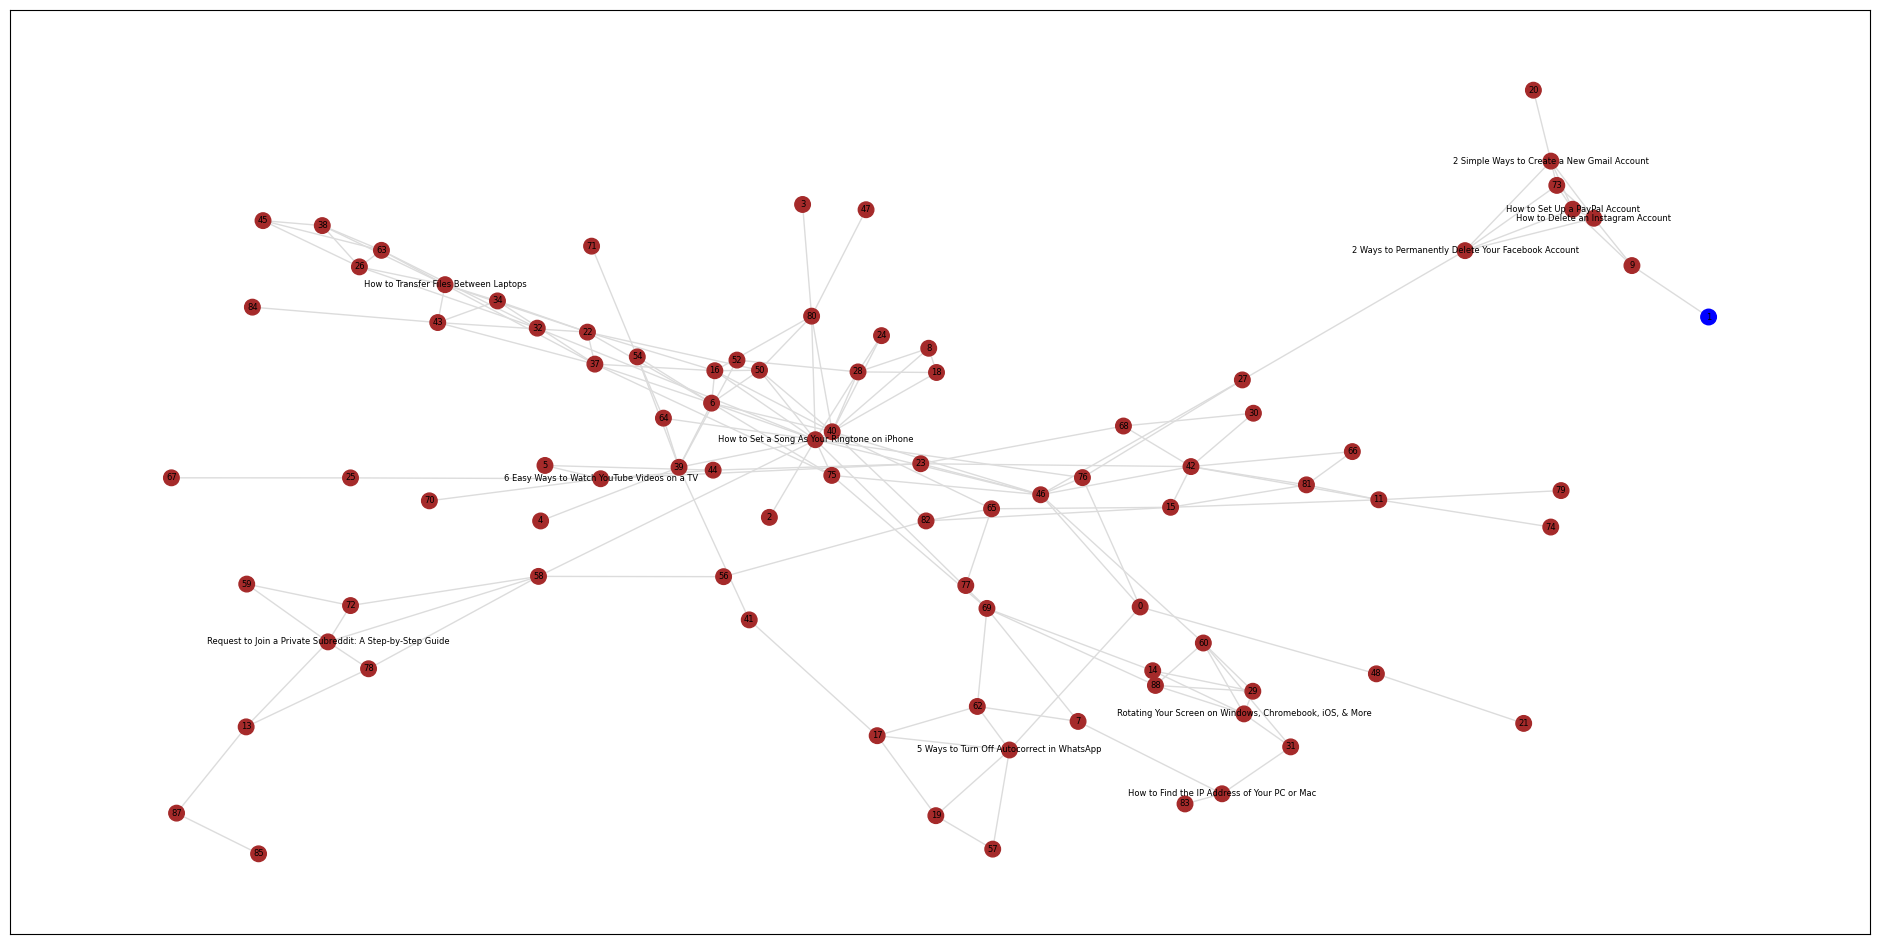

In [299]:
plt.figure(figsize=(24,12))

pos = nx.spring_layout(H, k=0.15, seed=4572324)

nx.draw_networkx_nodes(H, pos=pos, node_size=125, node_color=node_color_H)
nx.draw_networkx_edges(H, pos=pos, edge_color="gainsboro")
nx.draw_networkx_labels(H, pos=pos, font_size=6, labels=H_node_labels, font_color="black")

plt.show()

In [295]:
H_node_labels

{"How to Clear Your Browser's Cache": '0',
 '11 Ways to Send Money Without Revealing Your Identity': '1',
 '3 Simple Ways to Link to a Certain Time in a YouTube Video': '2',
 'How to Remove a Blank Page in Word': '3',
 '3 Easy Ways to Report and Block a Gmail Account': '4',
 'How to Remotely Control Your iPhone from Your Computer': '5',
 'How to Add Fonts to Illustrator': '6',
 'How to Check Your Windows Version': '7',
 'How to Find Duplicates in Excel': '8',
 'How to Hide Your Real Name on PayPal (Using a Business Account)': '9',
 'Rotating Your Screen on Windows, Chromebook, iOS, & More': 'Rotating Your Screen on Windows, Chromebook, iOS, & More',
 'How to Copy Hashtags on Instagram': '11',
 'How to Set Up a PayPal Account': 'How to Set Up a PayPal Account',
 'How To Send a Message to Multiple Contacts on WhatsApp': '13',
 'How to Print Screen on an HP Laptop, Desktop, or Tablet': '14',
 'Easy Ways to Use Google Translate on Desktop and Mobile': '15',
 'How to Open and Edit a PDF in 

In [337]:
def find_subgraphs(subgraph):
    J = G.subgraph(subgraph)
    node_color_dict = {0: "blue", 1: "orange", 2: "green", 3: "red", 4: "purple", 5: "brown", 6: "pink"}
    node_color = [node_color_dict[G.nodes[node]["cluster"]] for node in J.nodes]

    centrality = nx.degree_centrality(J)
    important_nodes = []
    for node in J.nodes:
        neighbour_nodes = J.neighbors(node)
        neighbour_centralities = []
        for neighbour in neighbour_nodes:
            neighbour_centralities.append(centrality[neighbour])
        if centrality[node] >= max(neighbour_centralities):
            important_nodes.append(node)
    
    J_node_labels = {node: node if node in important_nodes else str(idx) for idx, node in enumerate(J.nodes)}
    print(J_node_labels)
    plt.figure(figsize=(24,12))

    pos = nx.spring_layout(J, k=0.15, seed=4572324)

    nx.draw_networkx_nodes(J, pos=pos, node_size=125, node_color=node_color)
    nx.draw_networkx_edges(J, pos=pos, edge_color="gainsboro")
    nx.draw_networkx_labels(J, pos=pos, font_size=6, labels=J_node_labels, font_color="black")

    plt.show()

['How to Be Mentally and Emotionally Strong', 'How to Learn English', 'How to Get a Guy to Like You', 'How to Learn Mandarin Chinese']
{'How to Know if Your Girlfriend Is Cheating on You': '0', 'How to Be Positive': '1', 'How to Keep the Conversation Flowing with a Girl (for Guys)': '2', 'How to Get Over a Break Up': '3', 'How to Be Nonchalant': '4', 'How to Respond to a Sweet Text from a Guy': '5', 'How to Mingle With Strangers at Parties': '6', 'What to Do When Your Girlfriend Is Mad at You (10+ Steps to Take)': '7', 'How to Kiss a Girl': '8', 'How to Get a Girl to Like You': '9', 'How to Offer Encouragement to Someone Who Has Failed an Exam or Test': '10', 'How to Find Yourself': '11', 'How to Be Confident': '12', 'How to Be Mentally and Emotionally Strong': 'How to Be Mentally and Emotionally Strong', 'Does She Like Me? 15+ Signs She’s Into You': '14', '11 Ways to Tell if a Girl Wants to Hold Hands': '15', 'How to Spell': '16', 'How to Be Sexy at Any Age': '17', 'How to Turn a Girl

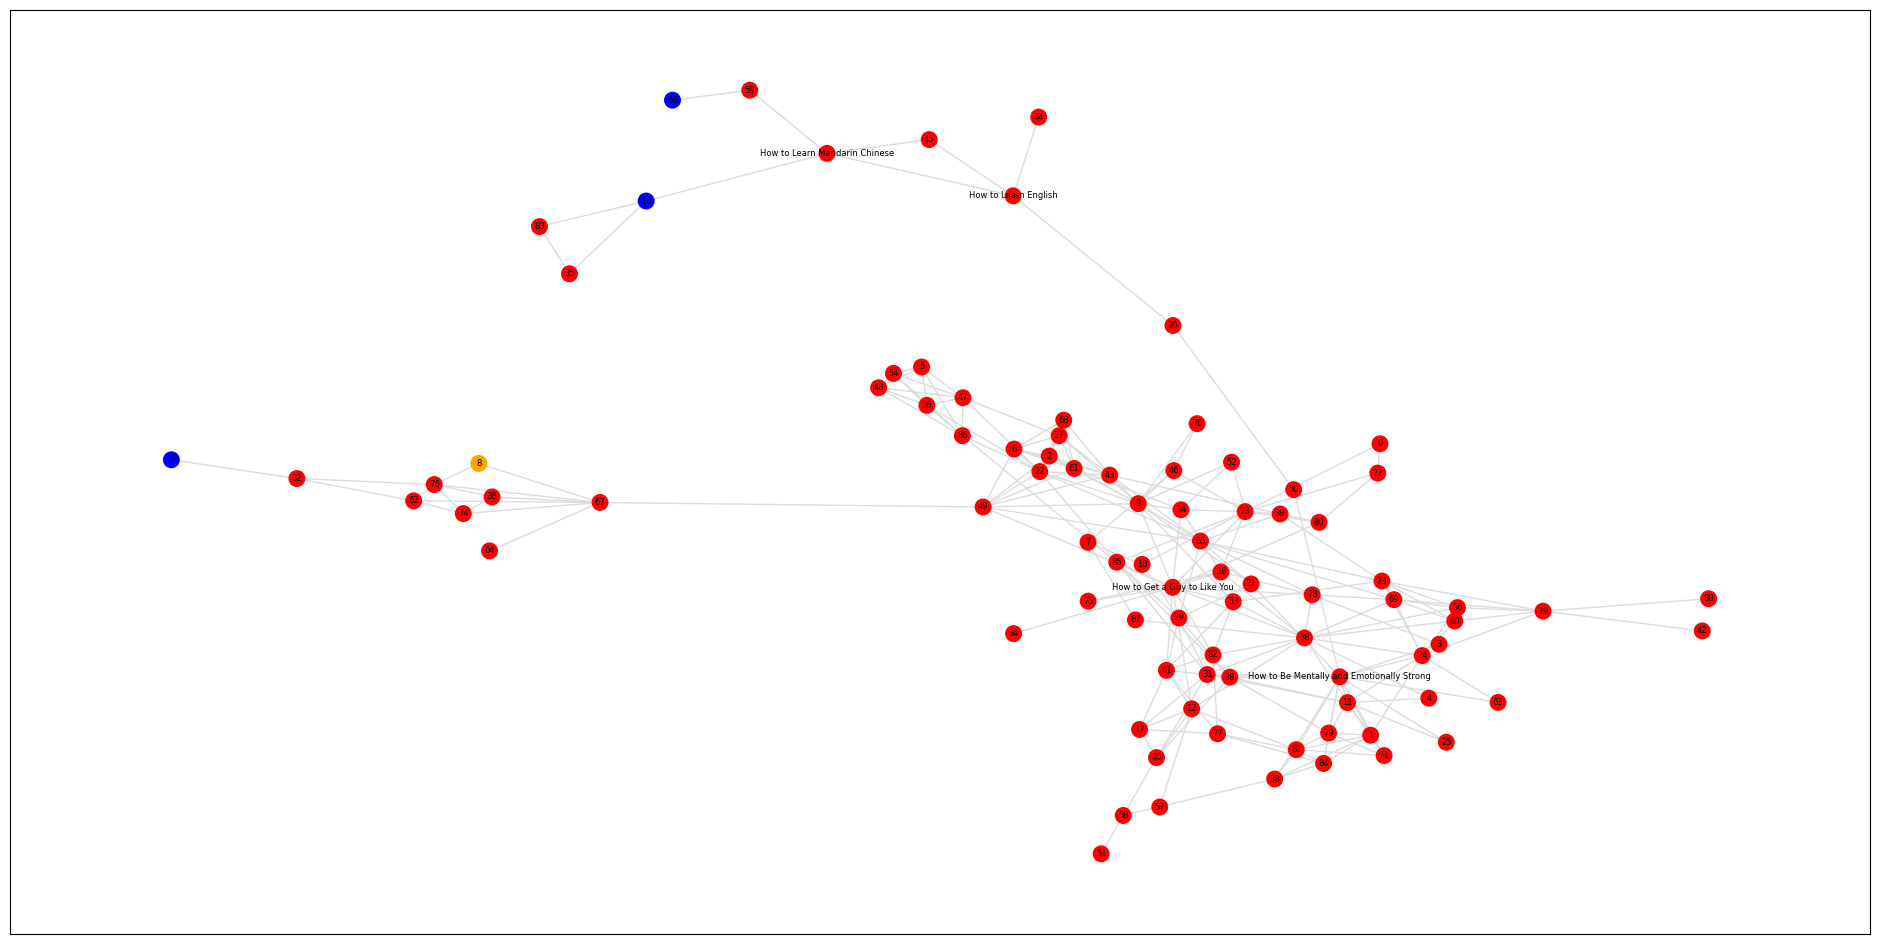

In [336]:
find_subgraphs(sorted(components, key=len)[-1])

{'How to Get Smaller Thighs: 14 Ways to Tone Your Legs': '0', 'The Correct Way to Do Push-Ups for Beginners': '1', 'How to Crack Your Upper Back': '2', 'How to Make Your Butt Bigger': '3', 'How to Do Crunches': '4', 'How to Be Healthy': '5', 'How to Lose Weight': '6', "How to Do Push Ups If You Can't Now": '7', 'How to Relieve & Prevent Headaches & Migraines Fast': '8', 'How to Get Rid of & Avoid Constipation Fast': '9', 'How to Build Muscle at Home': 'How to Build Muscle at Home', "How to Know if You're Double Jointed": '11', 'How to Get Rid of Knots in Your Back': 'How to Get Rid of Knots in Your Back', 'How to Get a Smaller Waist': 'How to Get a Smaller Waist'}


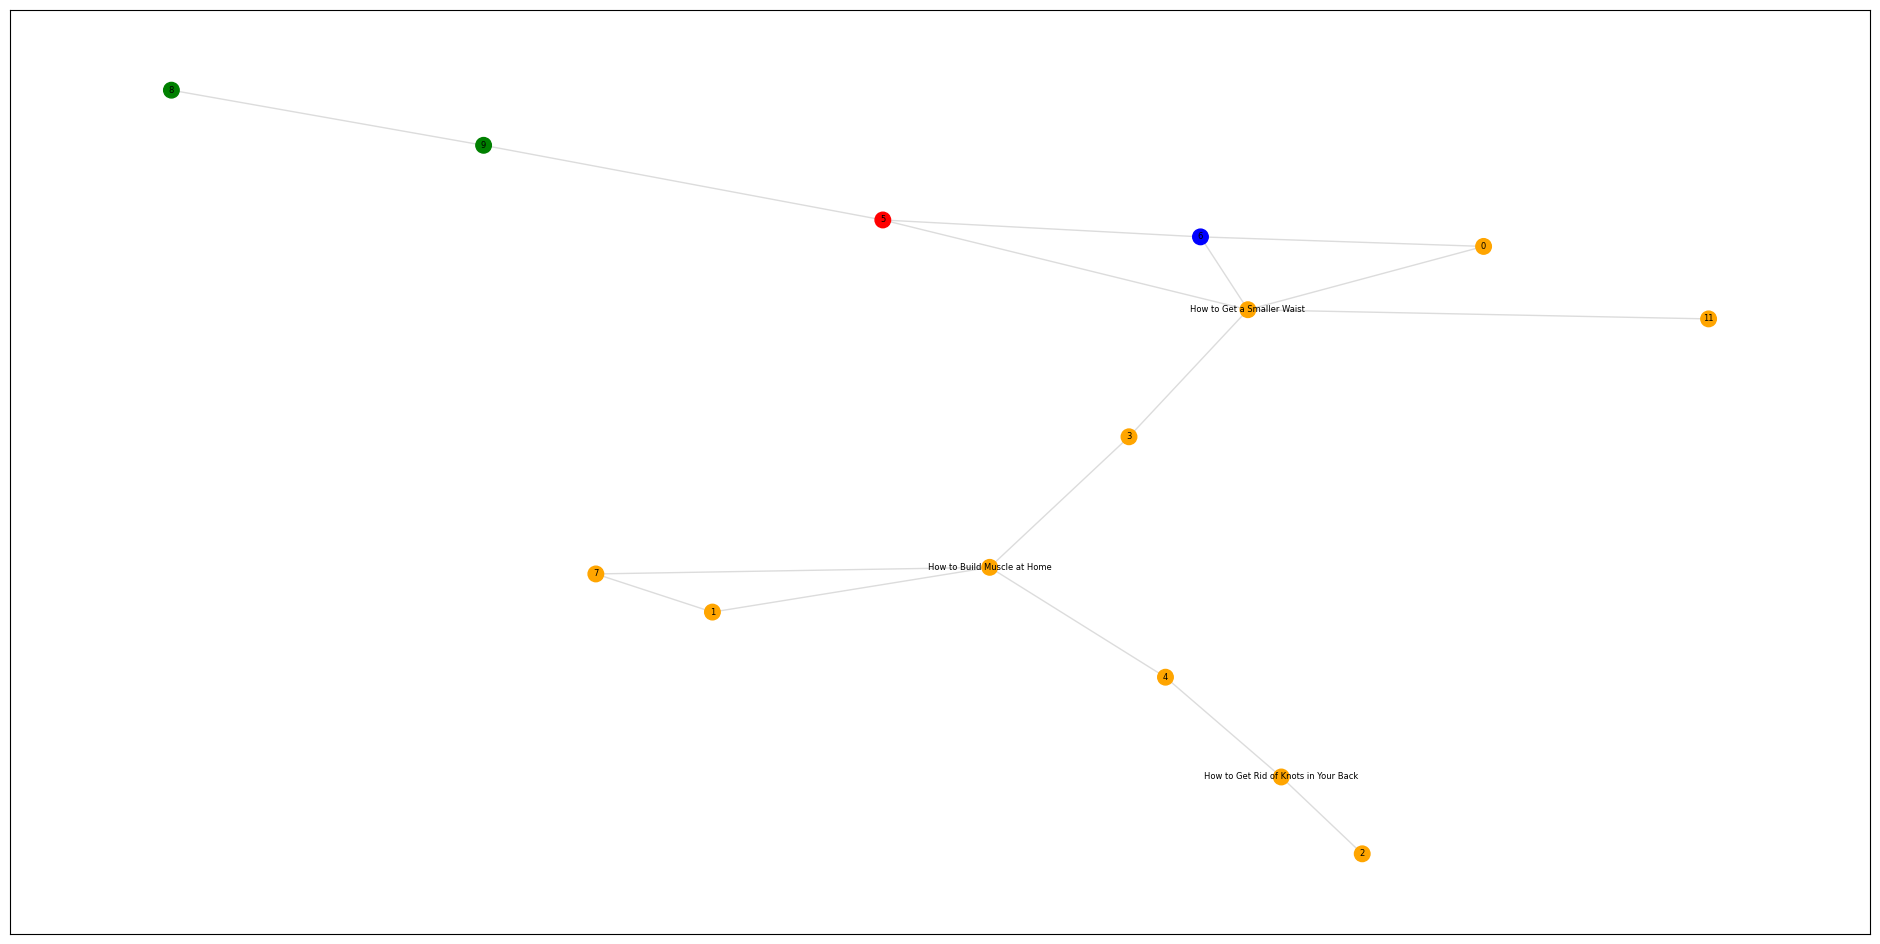

In [351]:
find_subgraphs(sorted(components, key=len)[-9])

In [82]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
#full_df[full_df["Cluster"] == 6]
full_df

,Title,Intro,Article Content,Co-authors,Updated,Views,Article,Cluster,Neighbours
0,How to Perform the Tahajjud Prayer,The Tahajjud is a special Islamic night prayer...,Arrange to wake up after midnight. After prayi...,60,"Updated: March 21, 2023",5638718,The Tahajjud is a special Islamic night prayer...,3,0
1,How to Take a Screenshot on a Windows PC: 8 Si...,Need to take a screenshot on your Windows PC? ...,Go to the screen that you want to capture. Whe...,321,"Updated: April 15, 2023",35602414,Need to take a screenshot on your Windows PC? ...,5,5
2,How to Play Poker,\nLooking to learn basic poker rules? Poker’s ...,Learn the 10 basic 5-card hands and their rank...,229,"Updated: April 12, 2023",7598092,\nLooking to learn basic poker rules? Poker’s ...,0,4
3,How to French Kiss,\nYou've seen it done in the movies and probab...,"Keep your lips soft. A soft, smooth, and sligh...",287,"Updated: December 13, 2022",27872519,\nYou've seen it done in the movies and probab...,3,7
4,How to Kiss,"\nSo you finally got ""the look"" and you're mov...",Drop hints that you're interested. You can put...,309,"Updated: April 8, 2023",33291709,"\nSo you finally got ""the look"" and you're mov...",3,3
5,How to Clear Your Browser's Cache,\nWhile your browser cache usually helps websi...,"Open Google Chrome {""smallUrl"":""https:\/\/www....",282,"Updated: April 6, 2023",24062038,\nWhile your browser cache usually helps websi...,5,4
6,How to Use a Bidet,"If you're traveling through Europe, Latin Amer...",Use the toilet first. The purpose of the bidet...,119,"Updated: February 25, 2023",6757442,"If you're traveling through Europe, Latin Amer...",2,1
7,How to Play Checkers,"Checkers, also known as draughts, is a fun and...",Determine who will have the first turn. Before...,61,"Updated: March 24, 2023",2767182,"Checkers, also known as draughts, is a fun and...",0,1
8,How to Play Go Fish,Go Fish is a super fun game you can play with ...,Pick someone to shuffle and deal the cards for...,39,"Updated: March 2, 2023",1079549,Go Fish is a super fun game you can play with ...,0,2
9,How to Tie a Tie,\nHave you graduated beyond the clip-on tie? B...,Drape the tie around your neck. With your coll...,238,"Updated: April 17, 2023",5753237,\nHave you graduated beyond the clip-on tie? B...,6,3


In [514]:
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [article_features[i] for i in topic.argsort()[:-10:-1]]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")

Topic 0: feel person like say talk peopl friend make ask
Topic 1: click tap select app window menu file icon screen
Topic 2: water dri remov clean skin cloth wash heat oil
Topic 3: fold paper end edg corner cut side make top
Topic 4: hair section cut head oil brush skin dri style
Topic 5: ball hand back foot arm leg pull push feet
Topic 6: game number play draw letter point line valu write


Topic 0: Emotions, Topic 1: Games, Topic 2: Technology, Topic 3: Personal care, Topic 4: Nail care, Topic 5: Crafts, Topic 6: Romance

Cluser 0 - Mathematics Cluster 1 - Emotions Cluster 2 - Crafts Cluster 3 - Grooming Cluster 4 - Technology Cluster 5 - Games Cluster 6 - Self-improvement

In [209]:
full_df["Topic"] = nmf_features.argmax(axis=1)

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

article_name = "How to Feed a Wild Rabbit"
full_df[full_df["Title"] == article_name]


,Title,Intro,Article Content,Co-authors,Updated,Views,Cluster
784,How to Feed a Wild Rabbit,"If you see a wild rabbit in your yard, you may...",Choose a spot in your yard to place the food. ...,29,"Updated: December 15, 2022",785227,2


In [469]:
full_df[full_df["Title"] == "How to Take Care of a Drunk Person"]

,Title,Intro,Article Content,Co-authors,Updated,Views,Cluster
945,How to Take Care of a Drunk Person,\nKnowing how to properly care for a drunk per...,Ask them how much they’ve had to drink. Knowin...,95,"Updated: September 1, 2022",2381457,3


In [212]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [214]:
full_df[full_df["Title"] == "How to Use a Bidet"]

,Title,Intro,Article Content,Co-authors,Updated,Views,Cluster,Topic
6,How to Use a Bidet,"If you're traveling through Europe, Latin Amer...",Use the toilet first. The purpose of the bidet...,119,"Updated: February 25, 2023",6757442,7,6
